In [7]:
#Import libraries
import pandas as pd
import geopandas as gpd
import math

In [8]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [9]:
#Data Analyses Libraries               
import numpy as np    
from urllib.request import urlopen
import json
import glob
import os

In [32]:
#Importing Data plotting libraries
import matplotlib.pyplot as plt     
import plotly.express as px       
import plotly.offline as py       
            
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import matplotlib.ticker as ticker
import matplotlib.animation as animation

In [14]:
#Importing Data plotting libraries
import matplotlib.pyplot as plt     
import plotly.express as px       
import plotly.offline as py       
import seaborn as sns             
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import matplotlib.ticker as ticker
import matplotlib.animation as animation

ImportError: DLL load failed: Δεν ήταν δυνατό να εντοπιστεί η καθορισμένη λειτ. μονάδα.

In [11]:
#Other Miscallaneous Libraries
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML
import matplotlib.colors as mc
import colorsys
from random import randint
import re

In [52]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\temperature.csv")
df = data.copy()

In [53]:
#Show the first dataset i will work
df.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
0,22-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0
1,23-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.56,14.9,0.00,1
2,24-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,4.50,10.4,0.17,1
3,25-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,7.78,6.1,0.57,1
4,26-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,6.00,10.8,0.00,1


In [54]:
print(df['Date'])

0        22-01-2020
1        23-01-2020
2        24-01-2020
3        25-01-2020
4        26-01-2020
            ...    
20283    26-03-2020
20284    27-03-2020
20285    28-03-2020
20286    29-03-2020
20287    30-03-2020
Name: Date, Length: 20288, dtype: object


In [55]:
# Create a base map
m_5 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=2)

# Add a heatmap to the base map
HeatMap(data=data[['Latitude', 'Longitude']], radius=10).add_to(m_5)

# Display the map
m_5

In [56]:
#Groping the same cities and countries together along with their successive dates.

country_list = data['Country'].unique()

country_grouped_covid = data[0:1]

for country in country_list:
    test_data = data['Country'] == country   
    test_data = data[test_data]
    country_grouped_covid = pd.concat([country_grouped_covid, test_data], axis=0)
    
country_grouped_covid.reset_index(drop=True)
country_grouped_covid.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
0,22-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0
0,22-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0
1,23-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.56,14.9,0.00,1
2,24-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,4.50,10.4,0.17,1
3,25-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,7.78,6.1,0.57,1


In [57]:
#Replacing NaN Values in State with a string "Not Reported"
country_grouped_covid['State'].replace(np.nan, "Not Reported", inplace=True)

#Printing the dataset
country_grouped_covid.head()

#country_grouped_covid holds the dataset for the country

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
0,22-01-2020,Not Reported,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0
0,22-01-2020,Not Reported,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0
1,23-01-2020,Not Reported,Afghanistan,0,0,0,0,33.0,65.0,5.56,14.9,0.00,1
2,24-01-2020,Not Reported,Afghanistan,0,0,0,0,33.0,65.0,4.50,10.4,0.17,1
3,25-01-2020,Not Reported,Afghanistan,0,0,0,0,33.0,65.0,7.78,6.1,0.57,1


In [58]:
#Creating the interactive map
py.init_notebook_mode(connected=True)

#GroupingBy the dataset for the map
formated_gdf = data.groupby(['Date', 'Country'])['Cumulative_cases', 'Cumulative_death'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%Y/%m/%d')

formated_gdf['log_ConfirmedCases'] = np.log(formated_gdf.Cumulative_cases + 1)
formated_gdf['log_Fatalities'] = np.log(formated_gdf.Cumulative_death + 1)

#Plotting the figure


fig = px.choropleth(formated_gdf, locations="Country", locationmode='country names', 
                     color="log_ConfirmedCases", hover_name="Country",projection="mercator",
                     animation_frame="Date",width=1000, height=800,
                     color_continuous_scale=px.colors.sequential.Viridis,
                     title='The Spread of COVID-19 Cases Across World')

#Showing the figure
fig.update(layout_coloraxis_showscale=True)
py.offline.iplot(fig)

In [59]:
#Creating the interactive map
py.init_notebook_mode(connected=True)

#GroupingBy the dataset for the map
formated_gdf = data.groupby(['Date', 'Country'])['Cumulative_cases', 'Cumulative_death'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%Y/%m/%d')

formated_gdf['log_ConfirmedCases'] = np.log(formated_gdf.Cumulative_cases + 1)
formated_gdf['log_Fatalities'] = np.log(formated_gdf.Cumulative_death + 1)

#Plotting the figure
fig = px.choropleth(formated_gdf, locations="Country", locationmode='country names', 
                     color="log_Fatalities", hover_name="Country",projection="mercator",
                     animation_frame="Date",width=1000, height=800,
                     color_continuous_scale=px.colors.sequential.Viridis,
                     title='The Deaths because of COVID-19 Cases')

#Showing the figure
fig.update(layout_coloraxis_showscale=True)
py.offline.iplot(fig)

In [60]:
#Plotting a bar graph for confirmed cases vs deaths due to COVID-19 in World.

unique_dates = country_grouped_covid['Date'].unique()
confirmed_cases = []
recovered = []
deaths = []

for date in unique_dates:
    date_wise = country_grouped_covid['Date'] == date  
    test_data = country_grouped_covid[date_wise]
    
    confirmed_cases.append(test_data['Cumulative_cases'].sum())
    deaths.append(test_data['Cumulative_death'].sum())
    
    
#Converting the lists to a pandas dataframe.

country_dataset = {'Date' : unique_dates, 'Cumulative_cases' : confirmed_cases,  'Cumulative_death' : deaths}
country_dataset = pd.DataFrame(country_dataset)
#Plotting the Graph of Cases vs Deaths Globally.
fig = go.Figure()
fig.add_trace(go.Bar(x=country_dataset['Date'], y=country_dataset['Cumulative_cases'], name='Confirmed Cases of COVID-19', marker_color='rgb(55, 83, 109)'))
fig.add_trace(go.Bar(x=country_dataset['Date'],y=country_dataset['Cumulative_death'],name='Total Deaths because of COVID-19',marker_color='rgb(26, 118, 255)'))

fig.update_layout(title='Confirmed Cases and Deaths from COVID-19',xaxis_tickfont_size=14,
                  yaxis=dict(title='Reported Numbers',titlefont_size=16,tickfont_size=14,),
    legend=dict(x=0,y=1.0,bgcolor='rgba(255, 255, 255, 0)',bordercolor='rgba(255, 255, 255, 0)'),barmode='group',bargap=0.15, bargroupgap=0.1)
fig.show()

   

In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# Loading datasets required for analysis

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

In [64]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\temperature.csv")                       
full_table = data.copy()

In [71]:
full_table.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence,Active
0,22-01-2020,,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0,0
1,23-01-2020,,Afghanistan,0,0,0,0,33.0,65.0,5.56,14.9,0.00,1,0
2,24-01-2020,,Afghanistan,0,0,0,0,33.0,65.0,4.50,10.4,0.17,1,0
3,25-01-2020,,Afghanistan,0,0,0,0,33.0,65.0,7.78,6.1,0.57,1,0
4,26-01-2020,,Afghanistan,0,0,0,0,33.0,65.0,6.00,10.8,0.00,1,0


In [72]:
# Defining COVID-19 cases as per classifications 
cases = ['Cumulative_cases',  'Cumulative_death',  'Active']

# Defining Active Case: Active Case = confirmed - deaths 
full_table['Active'] = full_table['Cumulative_cases'] - full_table[ 'Cumulative_death'] 


# latest
full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()


# latest condensed
full_latest_grouped = full_latest.groupby('Country')['Cumulative_cases',  'Cumulative_death',  'Active'].sum().reset_index()


In [73]:
#Add an extra column with the active cases
temp = full_table.groupby(['Country', 'State'])['Cumulative_cases', 'Cumulative_death', 'Active'].max()

In [74]:
temp = full_table.groupby('Date')['Cumulative_cases','Cumulative_death' , 'Active'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1')

,Date,Cumulative_cases,Cumulative_death,Active
0,31-03-2020,196,4,192


In [75]:
#With the dark red colors we see the highest numbers of confirmed,active cases etc. in each country
temp_f = full_latest_grouped.sort_values(by='Cumulative_cases', ascending=False)
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='Reds')

,Country,Cumulative_cases,Cumulative_death,Active
0,Afghanistan,196,4,192


In [84]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\temperature.csv")                       
global_temp_country = data.copy()

In [85]:

global_temp_country.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
0,22-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0
1,23-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.56,14.9,0.00,1
2,24-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,4.50,10.4,0.17,1
3,25-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,7.78,6.1,0.57,1
4,26-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,6.00,10.8,0.00,1


In [86]:
global_temp_country_clear = global_temp_country.drop(['State','Cumulative_cases','Cumulative_death','Daily_cases','Daily_death','Latitude','Longitude','Wind_speed','Precipitation' , 'Fog_Presence'], axis=1)

In [87]:
global_temp_country_clear.head()

,Date,Country,Temperature
0,22-01-2020,Afghanistan,5.89
1,23-01-2020,Afghanistan,5.56
2,24-01-2020,Afghanistan,4.50
3,25-01-2020,Afghanistan,7.78
4,26-01-2020,Afghanistan,6.00


In [88]:
#Calculating average temperature by country

countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['Temperature'].mean())
# Building the data frame
    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

# Building the visual

layout = dict(
    title = 'GLOBAL AVERAGE LAND TEMPERATURES',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [89]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Υπολογιστής\temperature.csv")                       
temp_df = data.copy()

In [90]:
temp_df.head()

,Date,State,Country,Cumulative_cases,Cumulative_death,Daily_cases,Daily_death,Latitude,Longitude,Temperature,Wind_speed,Precipitation,Fog_Presence
0,22-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.89,9.4,0.00,0
1,23-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,5.56,14.9,0.00,1
2,24-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,4.50,10.4,0.17,1
3,25-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,7.78,6.1,0.57,1
4,26-01-2020,NaN,Afghanistan,0,0,0,0,33.0,65.0,6.00,10.8,0.00,1


In [91]:
temp_df = temp_df.drop(['State','Daily_cases','Daily_death','Latitude','Longitude','Wind_speed','Precipitation' , 'Fog_Presence'], axis=1)

In [94]:
# lets group the up based on Cases and Deathes
new_temp = temp_df.groupby(['Cumulative_cases', 'Cumulative_death']).Temperature.mean() # i'm taking an average value of temperature of cases
# series to data frame
new_temp_df = new_temp.to_frame()
new_temp_df = new_temp_df.reset_index()

# making a scatter plot axis for some limited values
# limiting this just to make it more visible 

X = new_temp_df.head(55).Cumulative_cases
Y = new_temp_df.head(55).Temperature
new_temp_df.head(100) # my temperature base data frame

,Cumulative_cases,Cumulative_death,Temperature
0,0,0,14.401592
1,1,0,14.182573
2,1,1,24.320833
3,2,0,15.492910
4,2,1,24.687368
...,...,...,...
95,36,1,16.350000
96,36,2,24.220000
97,37,0,16.644167
98,37,1,27.390000


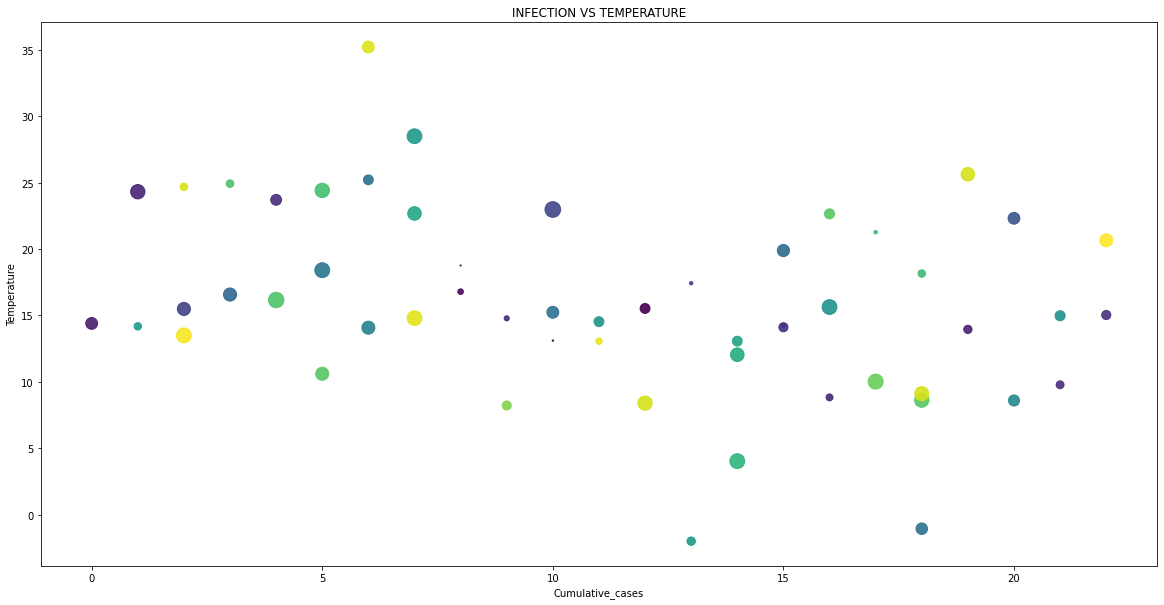

In [93]:
#Plot to see the connection between cases and temperature
N = 55
colors = np.random.rand(N)
area = (50 * np.random.rand(N))*5  # 0 to 15 point radii
plt.figure(figsize=(20,10))
plt.scatter(X, Y, s=area, c=colors, alpha=0.9)
plt.title('INFECTION VS TEMPERATURE')
plt.xlabel('Cumulative_cases')
plt.ylabel('Temperature')
plt.show()